In [39]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [40]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [41]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [42]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [43]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [44]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

In [45]:
fig=px.pie(df,values='diabetes',names='DEATH_EVENT',title='Death Analysis')
fig.show()

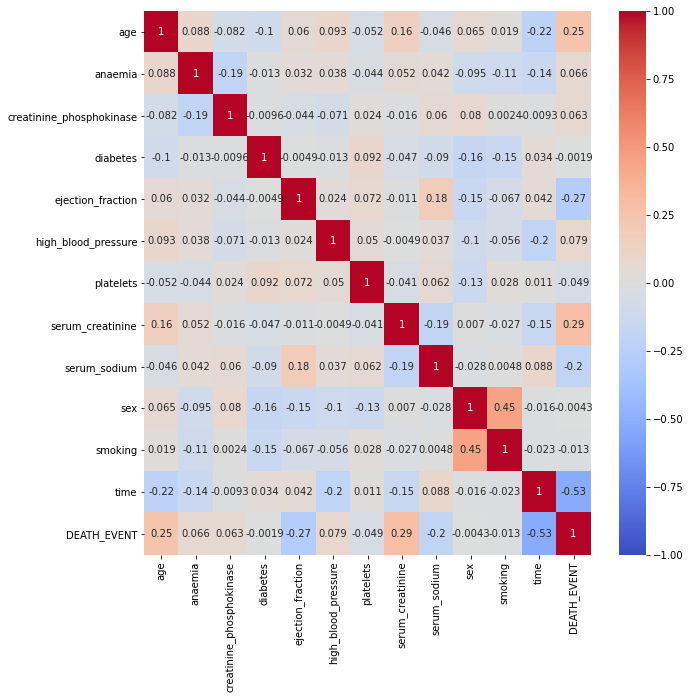

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True);

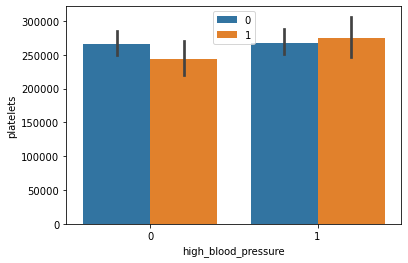

In [47]:
ax=sns.barplot(x='high_blood_pressure',y='platelets',hue='DEATH_EVENT',data=df)
plt.legend(loc=9)
plt.show()

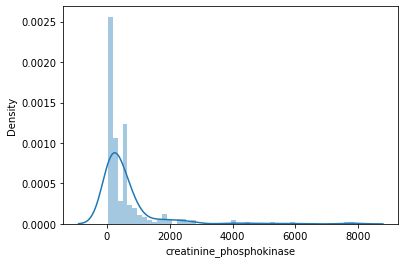

In [48]:
sns.distplot(df['creatinine_phosphokinase'], kde= True)
plt.show()

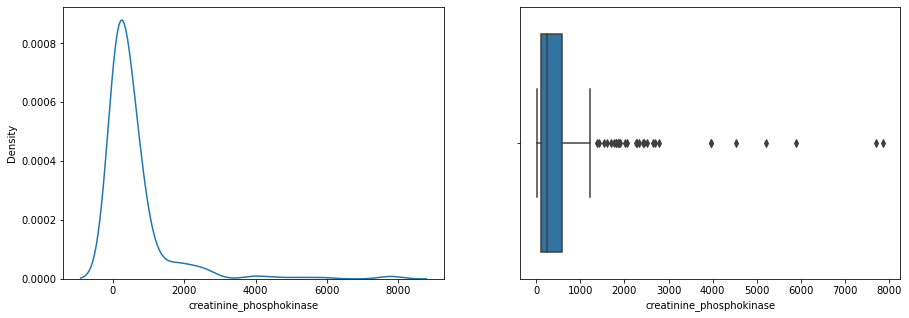

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['creatinine_phosphokinase'])

plt.subplot(1,2,2)
sns.boxplot(df['creatinine_phosphokinase'])
plt.show()

## LogisticRegression

In [50]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score

In [51]:
Feature=['time','ejection_fraction','serum_creatinine']
x=df[Feature]
y=df["DEATH_EVENT"]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_re=LogisticRegression()

In [55]:
log_re.fit(x_train,y_train)
log_re_pred=log_re.predict(x_test)

In [56]:
log_acc=accuracy_score(y_test,log_re_pred)
print("Logistic Accuracy Score: ","{:.2f}%".format(100*log_acc))

Logistic Accuracy Score:  90.00%


## Decision tree

In [57]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

t = np.array(list(df['creatinine_phosphokinase'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
creatinine_phosphokinase = pt.fit_transform(t)
df['creatinine_phosphokinase'] = creatinine_phosphokinase

t = np.array(list(df['serum_creatinine'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
serum_creatinine = pt.fit_transform(t)
df['serum_creatinine'] = serum_creatinine

df.drop(columns = ['sex', 'diabetes'], inplace = True)
X = df.iloc[:, 0:10].values
Y = df['DEATH_EVENT'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

dclf = DecisionTreeClassifier(criterion='gini',
                              max_depth=15,
                            )
dclf.fit(x_train, y_train)

pickle.dump(dclf, open('dclf.pkl', 'wb'))

clf = pickle.load(open('dclf.pkl', 'rb'))
print("Decision Tree :",clf.score(x_test, y_test))

Decision Tree : 0.9333333333333333


## XGBRF Classifier

In [58]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

t = np.array(list(df['creatinine_phosphokinase'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
creatinine_phosphokinase = pt.fit_transform(t)
df['creatinine_phosphokinase'] = creatinine_phosphokinase

t = np.array(list(df['serum_creatinine'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
serum_creatinine = pt.fit_transform(t)
df['serum_creatinine'] = serum_creatinine

df.drop(columns = ['sex', 'diabetes'], inplace = True)
X = df.iloc[:, 0:10].values
Y = df['DEATH_EVENT'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

xrclf = XGBRFClassifier()
xrclf.fit(x_train, y_train)
y_pred=xrclf.predict(x_test)

log_acc=accuracy_score(y_test,y_pred)
print("XGBRF Classifier: ","{:.2f}%".format(100*log_acc))

XGBRF Classifier:  93.33%


## XGBoost Classifier

In [59]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

t = np.array(list(df['creatinine_phosphokinase'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
creatinine_phosphokinase = pt.fit_transform(t)
df['creatinine_phosphokinase'] = creatinine_phosphokinase

t = np.array(list(df['serum_creatinine'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
serum_creatinine = pt.fit_transform(t)
df['serum_creatinine'] = serum_creatinine

df.drop(columns = ['sex', 'diabetes'], inplace = True)
X = df.iloc[:, 0:10].values
Y = df['DEATH_EVENT'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

xclf = XGBClassifier()
xclf.fit(x_train, y_train)

pickle.dump(xclf, open('xclf.pkl', 'wb'))

clf = pickle.load(open('xclf.pkl', 'rb'))
print("XGBoost Classifier:",clf.score(x_test, y_test))

XGBoost Classifier: 0.9666666666666667


In [61]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

t = np.array(list(df['creatinine_phosphokinase'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
creatinine_phosphokinase = pt.fit_transform(t)
df['creatinine_phosphokinase'] = creatinine_phosphokinase

t = np.array(list(df['serum_creatinine'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
serum_creatinine = pt.fit_transform(t)
df['serum_creatinine'] = serum_creatinine

df.drop(columns = ['sex', 'diabetes'], inplace = True)
X = df.iloc[:, 0:10].values
Y = df['DEATH_EVENT'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

pickle.dump(rfc, open('rfc.pkl', 'wb'))

clf = pickle.load(open('rfc.pkl', 'rb'))
print("RandomForestClassifier:",clf.score(x_test, y_test))

RandomForestClassifier: 0.9


In [62]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

t = np.array(list(df['creatinine_phosphokinase'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
creatinine_phosphokinase = pt.fit_transform(t)
df['creatinine_phosphokinase'] = creatinine_phosphokinase

t = np.array(list(df['serum_creatinine'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
serum_creatinine = pt.fit_transform(t)
df['serum_creatinine'] = serum_creatinine

df.drop(columns = ['sex', 'diabetes'], inplace = True)
X = df.iloc[:, 0:10].values
Y = df['DEATH_EVENT'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

pickle.dump(rfc, open('knn.pkl', 'wb'))

clf = pickle.load(open('knn.pkl', 'rb'))
print("KNeighborsClassifier:",knn.score(x_test, y_test))

KNeighborsClassifier: 0.6333333333333333


## KNeighborsClassfier

In [28]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() 
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test) 
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        19
           1       0.50      0.27      0.35        11

    accuracy                           0.63        30
   macro avg       0.58      0.56      0.55        30
weighted avg       0.61      0.63      0.60        30



## SVM

In [29]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) 
model3.fit(x_train, y_train) 

y_pred3 = model3.predict(x_test) 
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        19
           1       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30



## LogisticRegression

In [30]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) 
model1.fit(x_train, y_train)  

y_pred1 = model1.predict(x_test) 
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.70      0.64      0.67        11

    accuracy                           0.77        30
   macro avg       0.75      0.74      0.74        30
weighted avg       0.76      0.77      0.76        30



## DecisionTree

In [31]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) 
model5.fit(x_train, y_train) 

y_pred5 = model5.predict(x_test) 
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## XGBoostClassifier

In [32]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



## RandomForestClassifier

In [33]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)  

y_pred6 = model6.predict(x_test) 
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



In [34]:
importance = model6.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08957
Feature: 1, Score: 0.01189
Feature: 2, Score: 0.07970
Feature: 3, Score: 0.11814
Feature: 4, Score: 0.01514
Feature: 5, Score: 0.08811
Feature: 6, Score: 0.14668
Feature: 7, Score: 0.07312
Feature: 8, Score: 0.01367
Feature: 9, Score: 0.36398


<AxesSubplot:>

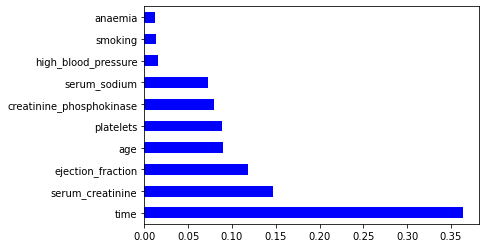

In [35]:
index= df.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')